In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
indices = ["^GSPC.csv", "^DJI.csv", "^NDX.csv", "^N225.csv", "^SSEC.csv", "^HSI.csv", 
           "^BSESN.csv", "^GDAXI.csv", "^SSMI.csv", "^MXX.csv", "^BVSP.csv"]
names = ["S&P 500", "DJ", "NDX", "N225", "SSE", "HSI", "BSESN", "DAX", "SMI", "MXX", "BVSP"]

In [3]:
data = []
for i in indices:
    df = pd.read_csv("data/"+i, index_col='Date')
    df_pct_ch = df['Close'].pct_change()
    data.append(df_pct_ch)

In [4]:
data = pd.concat(data, axis=1, join_axes=[data[0].index])
data.columns = names

C:\Users\Prabodh\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


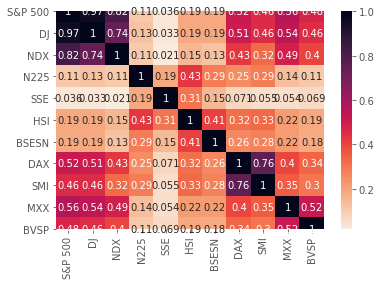

In [5]:
sns.heatmap(data.corr(), annot=True, cmap='rocket_r')

The following indices are highly correlated:
* S&P 500, DJ, NDX (US Indices)
* DAX, SMI (Germany and Switzerland)
* MXX, BVSP (Mexico and Brazil)

Therefore, DJ, NDX, DAX and MXX are excluded for further analysis.

In [6]:
indices_new = ["^GSPC.csv", "^N225.csv", "^SSEC.csv", "^HSI.csv", "^BSESN.csv", "^SSMI.csv", "^BVSP.csv"]
names_new = ["S&P 500", "N225", "SSE", "HSI", "BSESN", "SMI", "BVSP"]

C:\Users\Prabodh\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


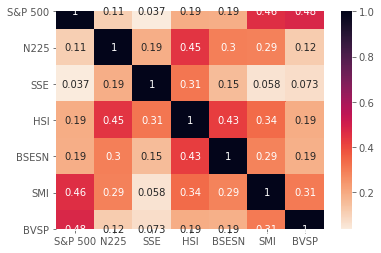

In [7]:
data_new = []
for index in indices_new:
    df = pd.read_csv("data/"+index, index_col='Date')
    df_t = pd.concat([df['Close'],
                        df['Close']/df['Close'][-1],
                        df['Close'].pct_change(),
                        df['Close'].pct_change().rolling(10).std()], axis=1).dropna()
    df_t.columns = ["Price", "Norm", "Change", "Volume"]
    data_new.append(df_t)

data_new[5] = data_new[5].loc['1990-11-09':,:]  # SMI has much missing data before 11/9/1990

df_pch = [d["Change"] for d in data_new]
df_returns = pd.concat(df_pch, axis=1, join_axes=[data_new[0].index])
df_returns.columns = names_new
corr = df_returns.corr()
ax = sns.heatmap(corr, annot=True, cmap='rocket_r')

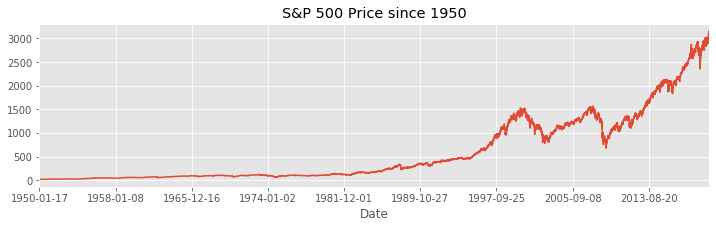

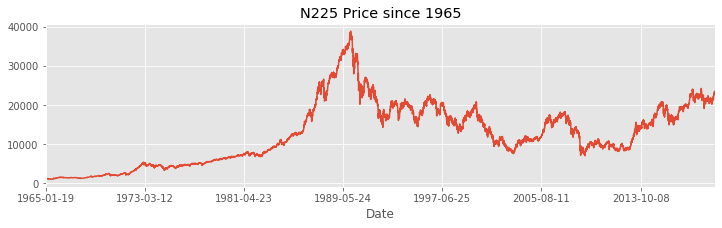

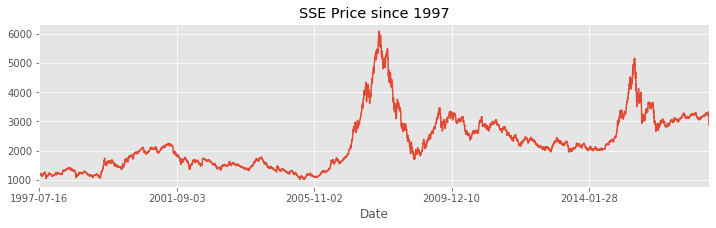

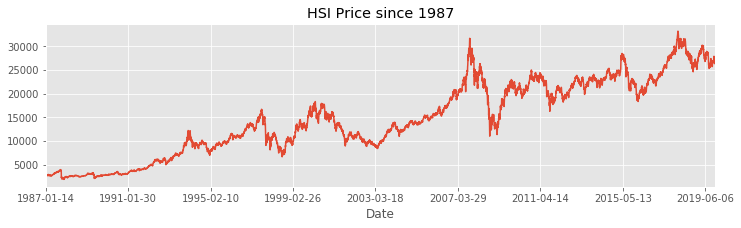

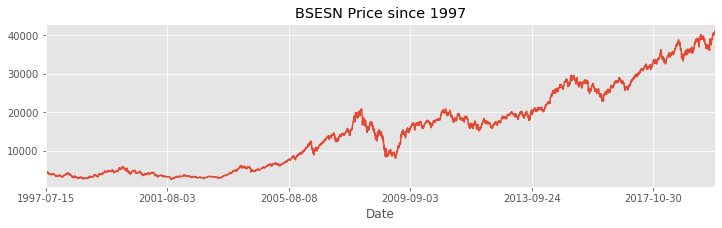

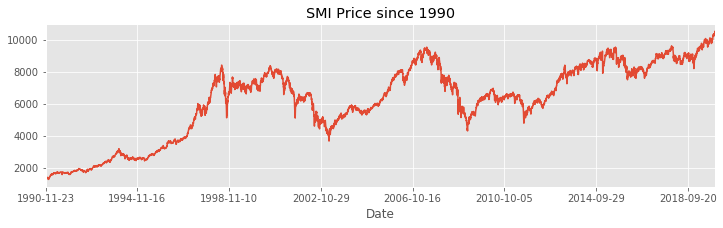

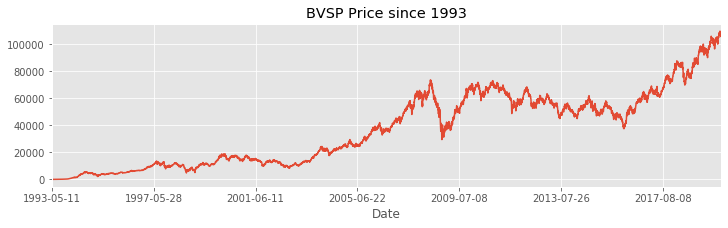

In [8]:
idx = 0
for i in data_new:
    i['Price'].plot(figsize=(12, 3))
    plt.title(names_new[idx]+" Price since "+str(i.index[0])[0:4])
    plt.show()
    idx += 1

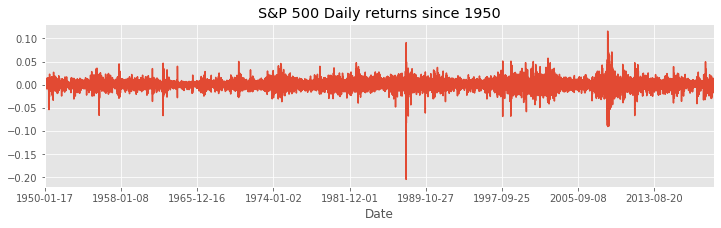

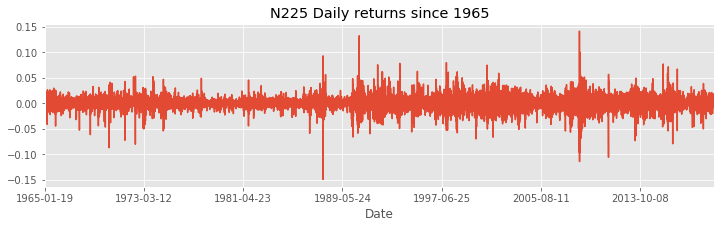

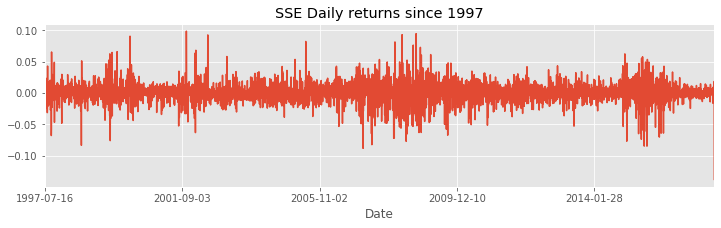

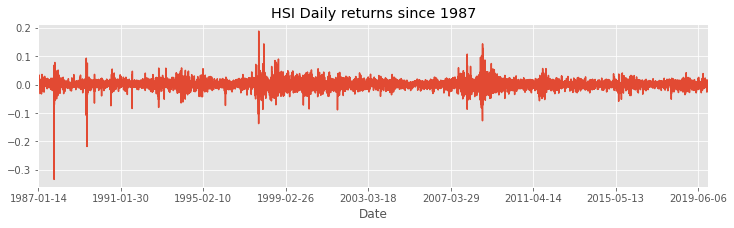

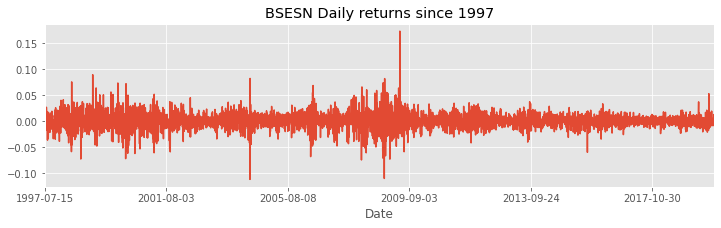

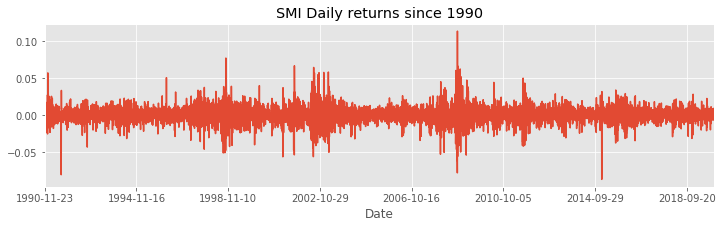

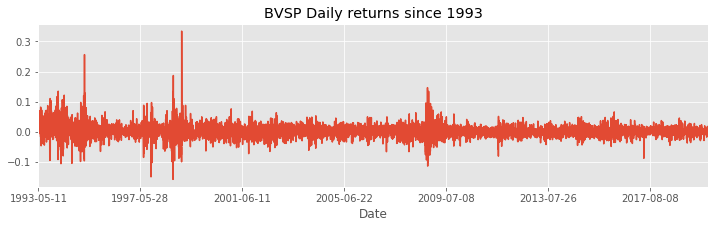

In [9]:
idx = 0
for i in data_new:
    i['Change'].plot(figsize=(12, 3))
    plt.title(names_new[idx]+" Daily returns since "+str(i.index[0])[0:4])
    plt.show()
    idx += 1

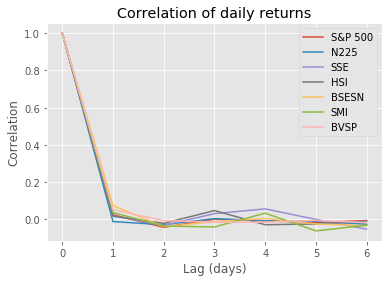

In [10]:
for i in data_new:
    corr = [1]
    for j in range(1, 7):
        corr.append(np.corrcoef(i['Change'][j:], i['Change'][:-j])[0, 1])
    plt.plot(corr)
plt.title("Correlation of daily returns")
plt.legend(names_new)
plt.xlabel("Lag (days)")
plt.ylabel("Correlation")
plt.show()

The autocorrelation of daily returns is close to 0 for lag > 1 day, indicating that the daily return is not a strong predictor for the price change of the following day.